## **Sentiment Analysis: Overview**
Sentiment analysis involves using Natural Language Processing (NLP) and machine learning to classify text as positive, negative, or neutral. It has applications in understanding public opinion, product feedback, and, in your case, the reception of movies.

In [9]:
import pandas as pd

df = pd.read_csv("FinalCleaned.csv")
display(df)

,Movie Name,Comment,IMDb Rating,Sentiment,Verdict
0,1917,Can't believe they made a whole Movie about ho...,8.3,Neutral,Hit
1,1917,The best part about this movie is how every au...,8.3,Positive,Hit
2,1917,crazy how this came out 87 years ago and it lo...,8.3,Positive,Hit
3,1917,The scene with the flares lighting up the ruin...,8.3,Negative,Hit
4,1917,The ending when he ran across the trench was ...,8.3,Neutral,Hit
...,...,...,...,...,...
32156,Wonder Woman 1984,Yup. Just imagine a coherent interesting stor...,6.5,Positive,Average
32157,Wonder Woman 1984,Watch it be a “Modern Warfare” or “Rise of Sky...,6.5,Positive,Average
32158,Wonder Woman 1984,"Mohammad hosseini Money, but I’m so confused, ...",6.5,Negative,Average
32159,Wonder Woman 1984,@joshiewashe9486 Watch it have thor ragnarok...,6.5,Neutral,Average


In [10]:
!pip install emoji
from PreProcess import PreProcess

preprocess = PreProcess()
preprocessed_data_ready_for_training = preprocess.preprocess_dataframe(df)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
display(preprocessed_data_ready_for_training)

,Movie Name,Comment,IMDb Rating,Sentiment,Verdict
0,1917,ca believe made whole movie parent got school,8.3,Neutral,Hit
1,1917,best part movie every audience fooled believin...,8.3,Positive,Hit
2,1917,crazy came 87 year ago look good impressive,8.3,Positive,Hit
3,1917,scene flare lighting ruined village insane cin...,8.3,Negative,Hit
4,1917,ending ran across trench absolutely amaizing,8.3,Neutral,Hit
...,...,...,...,...,...
32154,Wonder Woman 1984,yup imagine coherent interesting story good ac...,6.5,Positive,Average
32155,Wonder Woman 1984,watch modern warfare rise skywalker script pho...,6.5,Positive,Average
32156,Wonder Woman 1984,mohammad hosseini money confused come,6.5,Negative,Average
32157,Wonder Woman 1984,joshiewashe9486 watch thor ragnarok plot scree...,6.5,Neutral,Average


In [18]:
import os
import joblib
from sklearn.feature_extraction.text import CountVectorizer

def create_and_save_count_vectorizer(data, vectorizer_path='model/count_vectorizer.pkl'):
    """
    Creates a CountVectorizer, fits it to the data, and saves it.

    Args:
        data (pd.Series): Text data to fit the vectorizer.
        vectorizer_path (str): Path to save the vectorizer.

    Returns:
        CountVectorizer: The fitted CountVectorizer.
    """
    print("Creating and fitting CountVectorizer...")
    vectorizer = CountVectorizer(max_features=5000, stop_words='english')
    vectorizer.fit(data)
    os.makedirs(os.path.dirname(vectorizer_path), exist_ok=True)
    joblib.dump(vectorizer, vectorizer_path)
    print(f"CountVectorizer saved to {vectorizer_path}")
    return vectorizer

# Example usage:
create_and_save_count_vectorizer(preprocessed_data_ready_for_training['Comment'], 'model/count_vectorizer.pkl')


Creating and fitting CountVectorizer...
CountVectorizer saved to model/count_vectorizer.pkl


CountVectorizer(max_features=5000, stop_words='english')

Preprocessing data...
Training model...
Making predictions...
Evaluating model...


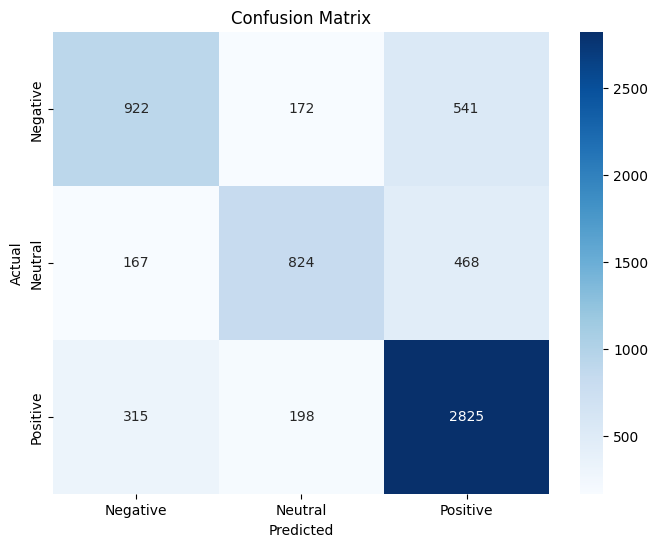

Plotting time analysis...


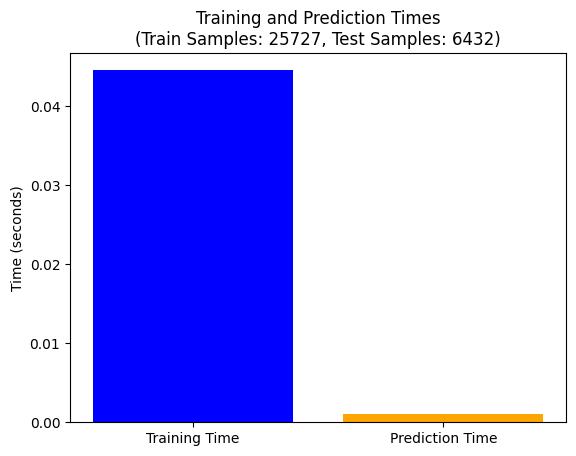

Results:
Training Time: 0.04 seconds
Prediction Time: 0.00 seconds
Classification Report:
              precision    recall  f1-score   support

    Negative       0.66      0.56      0.61      1635
     Neutral       0.69      0.56      0.62      1459
    Positive       0.74      0.85      0.79      3338

    accuracy                           0.71      6432
   macro avg       0.69      0.66      0.67      6432
weighted avg       0.71      0.71      0.70      6432



In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib
import os
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer



def sentiment_analysis_pipeline(dataset):
    """
    Perform end-to-end sentiment analysis using TF-IDF + Naive Bayes.
    Includes preprocessing, model training, evaluation, and visualization.

    Args:
        dataset (pd.DataFrame): Dataset with columns 'Comment' and 'Sentiment'.

    Returns:
        dict: Evaluation metrics and plots.
    """
    results = {}

    # Step 1: Preprocessing
    print("Preprocessing data...")
    count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
    X = count_vectorizer.fit_transform(dataset['Comment'])
    y = dataset['Sentiment']

    # Step 2: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Model Training
    print("Training model...")
    model = MultinomialNB()
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    results['training_time'] = end_train - start_train
    results['num_train_samples'] = X_train.shape[0]

    # Save the model
    os.makedirs('model', exist_ok=True)
    model_path = 'model/bow_sentiment_model.h5'
    joblib.dump(model, model_path)

    # Step 4: Model Prediction
    print("Making predictions...")
    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()
    results['prediction_time'] = end_pred - start_pred
    results['num_test_samples'] = X_test.shape[0]

    # Step 5: Evaluation Metrics
    print("Evaluating model...")
    results['classification_report'] = classification_report(y_test, y_pred, output_dict=True)
    results['confusion_matrix'] = confusion_matrix(y_test, y_pred)

    # Plot Training and Validation Curve
    os.makedirs('metrics', exist_ok=True)
    plt.figure(figsize=(8, 6))
    sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('metrics/bow_confusion_matrix.png')
    plt.show()

    # Step 6: Plot Training Times
    print("Plotting time analysis...")
    plt.figure()
    plt.bar(['Training Time', 'Prediction Time'], [results['training_time'], results['prediction_time']], color=['blue', 'orange'])
    plt.ylabel("Time (seconds)")
    plt.title(f"Training and Prediction Times\n(Train Samples: {results['num_train_samples']}, Test Samples: {results['num_test_samples']})")
    plt.savefig('metrics/bow_training_prediction_times.png')
    plt.show()

    # Step 7: Save Metrics
    print("Results:")
    print(f"Training Time: {results['training_time']:.2f} seconds")
    print(f"Prediction Time: {results['prediction_time']:.2f} seconds")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    return results

results = sentiment_analysis_pipeline(preprocessed_data_ready_for_training)

Choose a model for sentiment analysis:
1. Model 1 (Basic Naive Bayes Model)
2. BOW Model
3. TF-IDF Naive Bayes Model
Sentiment
Positive    169
Negative     20
Neutral      20
Name: count, dtype: int64


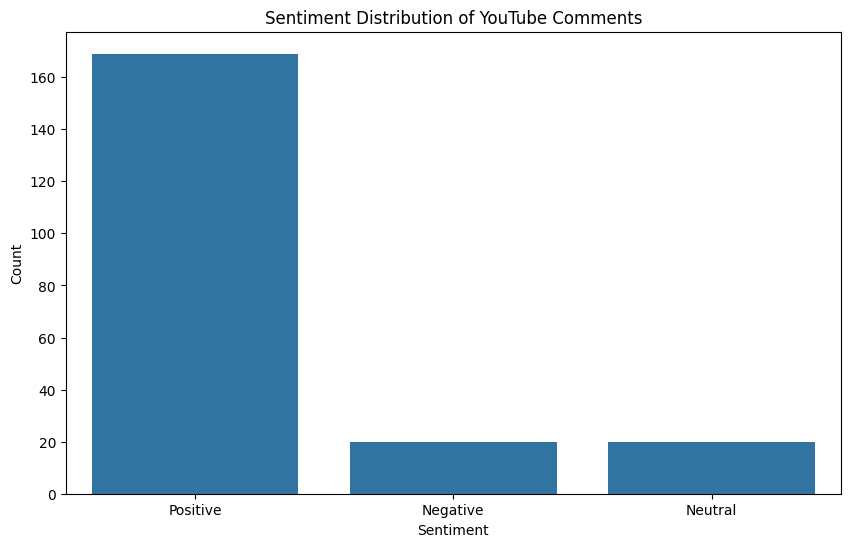

In [24]:
import os
import pandas as pd
import joblib
from youtube_comment_downloader import YoutubeCommentDownloader, SORT_BY_POPULAR
from PreProcess import PreProcess
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

def predict_sentiment_from_youtube(
    youtube_url, 
    model_1_path='model/model_1.h5', 
    model_2_path='model/bow_sentiment_model.h5', 
    tfidf_model_path='model/tfidf_sentiment_model.h5',
    vectorizer_path='model/tfidf_vectorizer.pkl'
):
    """
    Downloads YouTube comments, preprocesses them, and predicts sentiment using a selected model.

    Args:
        youtube_url (str): URL of the YouTube video to download comments from.
        model_1_path (str): Path to the first sentiment analysis model.
        model_2_path (str): Path to the second sentiment analysis model.
        tfidf_model_path (str): Path to the TF-IDF Naive Bayes model.
        vectorizer_path (str): Path to the saved TF-IDF vectorizer.

    Returns:
        pd.DataFrame: DataFrame with comments and sentiment predictions.
    """
    # Ask the user to select a model
    print("Choose a model for sentiment analysis:")
    print("1. Model 1 (Basic Naive Bayes Model)")
    print("2. BOW Model")
    print("3. TF-IDF Naive Bayes Model")
    choice = int(input("Enter your choice (1, 2, or 3): "))

    # Load the chosen model
    if choice == 1:
        model = joblib.load(model_1_path)
    elif choice == 2:
        model = joblib.load(model_2_path)
    elif choice == 3:
        model = joblib.load(tfidf_model_path)
        vectorizer = joblib.load(vectorizer_path)
    else:
        raise ValueError("Invalid choice. Please select 1, 2, or 3.")

    # Initialize the YouTube comment downloader
    downloader = YoutubeCommentDownloader()

    # Download comments from the provided YouTube URL
    comments = downloader.get_comments_from_url(youtube_url, sort_by=SORT_BY_POPULAR)

    # Save the comments to a DataFrame
    comments_df = pd.DataFrame(comments)
    comments_df = comments_df[comments_df['text'].apply(lambda x: len(x) > 100)]
    comments_df.rename(columns={'text': 'Comment'}, inplace=True)

    # Preprocess comments
    preprocess = PreProcess()
    preprocessed_data_ready_for_testing = preprocess.preprocess_dataframe(comments_df)

    if choice == 3:
        # Apply TF-IDF vectorization for Model 3
        X = vectorizer.transform(preprocessed_data_ready_for_testing['Comment'])
    else:
        # Apply Count Vectorization for Model 1 and Model 2
        vectorizer_path = 'model/count_vectorizer.pkl'
        count_vectorizer = joblib.load(vectorizer_path)
        X = count_vectorizer.transform(preprocessed_data_ready_for_testing['Comment'])

    # Predict sentiment
    predictions = model.predict(X)

    # Save predictions to DataFrame
    preprocessed_data_ready_for_testing['Sentiment'] = predictions

    # Overview of sentiments
    sentiment_counts = preprocessed_data_ready_for_testing['Sentiment'].value_counts()
    print(sentiment_counts)

    # Plotting the sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Sentiment', data=preprocessed_data_ready_for_testing, order=preprocessed_data_ready_for_testing['Sentiment'].value_counts().index)
    plt.title('Sentiment Distribution of YouTube Comments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    return preprocessed_data_ready_for_testing

youtube_url = "https://www.youtube.com/watch?v=8ugaeA-nMTc"  
predictions_df = predict_sentiment_from_youtube(youtube_url)
